# Проект: Spotify

**Цель исследования:**

1. Построить модель, которая сможет предсказать уровень популярности песни.
        
      **Ход исследования:**
       
      Считаю CSV-файл с данными dataset.csv с помощью библиотеки pandas и сохраню их в датафреймы. Так как о данных ничего не известно, придется изучить общую информацию о датафрейме.
      На этапе предобработки я проверю данные на ошибки и оценю их влияние на исследование. Приведу датафреймы к исправному типу, исправив ошибки в данных. Затем приступлю к исследовательскому анализу данных, визуализирую данные и приступлю к подготовке данных в пайплайне для дальнейшего обучения моделей. Обучу 4 модели: DecisionTreeRegressor, LinearRegression, LightGBM, LogisticRegression. Узнаю какая из них лучшая. В конце напишу промежуточные выводы о том, какая модель лучше. Визуализирую важность признаков для таргета в конце и напишу общий вывод.
      
      Таким образом, моё исследование пройдет в тринадцать этапов:
      
      - Загрузка данных 
      - Предобработка данных   
      - Исследовательский анализ данных               
      - Подготовка данных     
      - Обучение моделей                             
      - Результаты обучения
      - Важность признаков        
      - Общий вывод

### Описание признаков

 - Unnamed: 0 - номер строки ( нужно удалить )
 - track_id - id песни
 - artists - исполнитель песни
 - album_name - название альбома, в котором содержится данная песня
 - track_name - название песни
 - popularity - популярность песни ( насколько песня популярна от 0 до 100 )
 - duration_ms - длительность песни в миллисекундах
 - explicit - является ли песня "откровенной" ( ненормативная лексика, ссылки на физическое или психологическое насилие, и так далее )
 - danceability - числовое значение в диапазоне от 0,0 до 1,0, которое отражает уровень в том, что трек является танцевальным
 - energy - числовое значение в диапазоне от 0,0 до 1,0, которое отражает уровень в том, что трек является энергичным
 - key - тональность песни ( от "До мажор" до "Си мажор" )
 - loudness - числовое значение в диапазоне от -50 до 4, которое отражает уровень в том, что трек является громким    
 - mode - тип тональности ( минор или мажор )      
 - speechiness - числовое значение в диапазоне от 0,0 до 1,0, которое отражает процентное соотношение слов и инструментала в песни    
 - acousticness - числовое значение в диапазоне от 0,0 до 1,0, которое отражает уровень в том, что трек является акустическим
 - instrumentalness - насколько вероятно, что музыка не содержит вокала, произнесенного устно.
 - liveness - числовое значение в диапазоне от 0,0 до 1,0, которое отражает уровень в том, что трек является инструментальным         
 - valence - числовое значение в диапазоне от 0,0 до 1,0, которое отражает уровень в том, что трек описывает музыкальную позитивность        
 - tempo - скорость, с которой проигрывается музыкальное произведение            
 - time_signature - сколько долей содержится в каждом такте музыкального произведения   
 - track_genre - жанр песни

# Шаг 1. Загрузка данных

In [6]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler,
    PolynomialFeatures
)
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as ss
import math as m
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from base64 import b64encode
from IPython.display import display, HTML
import io
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#from phik import phik
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from numpy.random import RandomState
import scipy.stats as st 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint
import socket
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from math import sqrt
import time
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_absolute_error,
    roc_auc_score,
    f1_score,
    make_scorer, 
    mean_squared_error    
)
from sklearn.preprocessing import MultiLabelBinarizer
#import category_encoders as ce
from scipy.sparse import hstack
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from sklearn.inspection import permutation_importance
import shap
from scipy.sparse import csr_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [7]:
RANDOM_STATE = int('12345')

In [8]:
try:
    data = pd.read_csv(r'dataset.csv')
except:
    data = pd.read_csv(r'C:\Users\semos\Downloads\dataset.csv')

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
data.sample()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
46835,46835,7CFRxAfwJs3OjZ18edLEZ9,Dj Mad Dog,Till I Die Vol.1,1996 - Radio Edit,17,210100,False,0.448,0.996,7,-0.871,1,0.108,0.139,0.0284,0.358,0.288,174.054,4,happy


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [12]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [13]:
data.duplicated().sum()

0

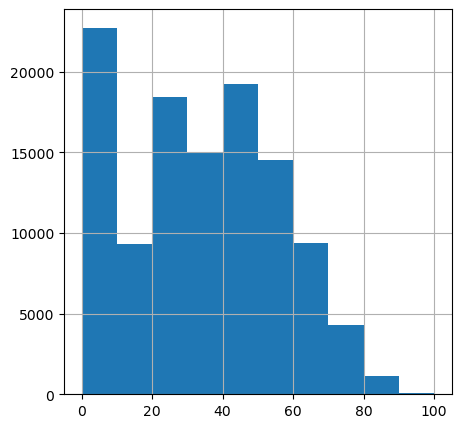

In [14]:
data['popularity'].hist(figsize = (5,5));

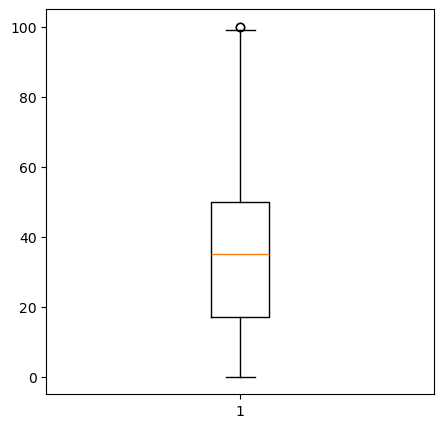

In [15]:
plt.figure(figsize=(5, 5))
plt.boxplot(data['popularity']);

In [16]:
data['popularity'].value_counts().head(2)

popularity
0     16020
22     2354
Name: count, dtype: int64

In [17]:
data['popularity'].value_counts().tail(2)

popularity
100    2
99     1
Name: count, dtype: int64

In [18]:
np.sort(data['popularity'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [19]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [20]:
data[data['artists'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [21]:
data.shape

(114000, 21)

<div class="alert alert-success">
Считали файл `dataset.csv`. Обнаружили 3 пропущенных значения в данных в столбцах `artists`, `album_name`, `track_name`, которые мы удалим. Проанализировали целевой признак `popularity`: большинство значений находятся в диапозоне 18-50, 16000 нулевых значений ( скорее всего, это не аномалия, а просто неактуальные песни ) и несколько значений 98-100. Явных дубликатов не обнаружили. Стоит удалить признак `Unnamed: 0`, так как он является номером каждой строки, а затем посмотреть на наличие дуюликатов.
</div>

# Шаг 2. Предобработка данных

In [24]:
data_new = data.dropna()

In [25]:
data_new.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

<div class="alert alert-success">
Удалили пропущенные значения.
</div>

In [27]:
data_new = data_new.drop('Unnamed: 0', axis = 1)

<div class="alert alert-success">
Удалили ненужный признак Unnamed: 0
</div>

In [29]:
data_new.duplicated().sum()

450

In [30]:
data_new = data_new.drop_duplicates()

<div class="alert alert-success">
Удалили все явные дубликаты.
</div>

In [32]:
data_new.duplicated().sum()

0

In [33]:
data_new[data_new['popularity'] == 98].head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.04,4,dance
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.04,4,edm


In [34]:
data_new['track_id'].duplicated().sum()

23809

<div class="alert alert-success">
Заметили, что в 23809 строках повторяются некоторые песни, у которых все признаки одинаковые, кроме жанра. Это означает, что у некоторых песен есть 2, 3 или больше жанров.
</div>

In [36]:
genres = data_new.groupby('track_id')['track_genre'].apply(list).reset_index()

data_new_1=data_new.copy()

data_new = data_new_1[['track_id', 'artists', 'album_name', 'track_name',\
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',\
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',\
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',\
       ]].drop_duplicates()

data_new = data_new.merge(genres,on='track_id',how='left')

In [37]:
data_new[['track_genre','track_id']].head(3)

,track_genre,track_id
0,"[acoustic, j-pop, singer-songwriter, songwriter]",5SuOikwiRyPMVoIQDJUgSV
1,"[acoustic, chill]",4qPNDBW1i3p13qLCt0Ki3A
2,[acoustic],1iJBSr7s7jYXzM8EGcbK5b


In [38]:
data_new['explicit'] = data_new['explicit'].astype(int)

In [39]:
data_new['multi_genre'] = data_new['track_genre'].apply(lambda x: 1 if len(x) > 1 else 0)

In [40]:
data.shape

(114000, 21)

In [41]:
data_new.shape

(90460, 21)

<div class="alert alert-success">
Мы сгруппировали датасет по id каждого трека, тем самым все жанры одного трека совместили в один список, который останеться в признаке track_genre. Также создали новй признак multi_genre, который будет отвечать за мультижанровость трека (если у трека один жанр, то 0, если 2 и больше, то 1).
</div>

In [43]:
row_reduction_percentage = ((data.shape[0] - data_new.shape[0]) / data.shape[0]) * 100
f"Процент уменьшения строк: {row_reduction_percentage:.2f}%"

'Процент уменьшения строк: 20.65%'

<div class="alert alert-success">
Размер обработанного датасета data_new уменьшился в размере на 21%.
</div>

# Шаг 3. Исследовательский анализ данных

In [46]:
def plot_hist_box(df, column, hist_title=None, box_title=None):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.histplot(data=df[column], ax=axes[0])
    if hist_title is not None:
        axes[0].set_title(hist_title)

    sns.boxplot(data=df[column], ax=axes[1])
    if box_title is not None:
        axes[1].set_title(box_title)
        
    plt.show()

<div class="alert alert-success">
Написали функцию для визуализации количественных признаков при помощи гистограммы и боксплота.
</div>

In [48]:
data_new.head(1)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,multi_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",1


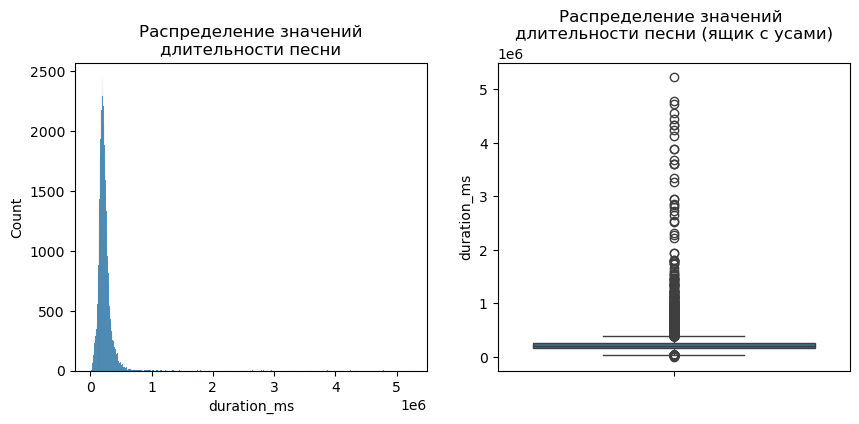

In [49]:
plot_hist_box(data_new, 'duration_ms', '''Распределение значений
длительности песни''', '''Распределение значений 
длительности песни (ящик с усами)''')

<div class="alert alert-success">
Все аномальные значения обьяснимы: некоторые песни могут быть очень долгими по времению.
</div>

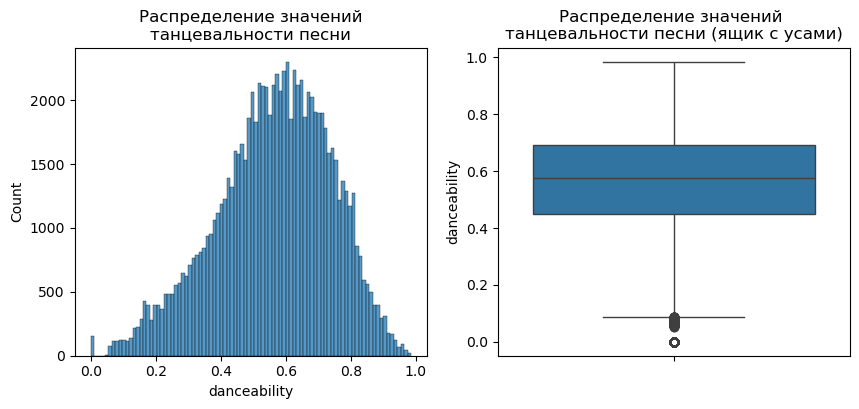

In [51]:
plot_hist_box(data_new, 'danceability', '''Распределение значений
танцевальности песни''', '''Распределение значений 
танцевальности песни (ящик с усами)''')

In [52]:
data_new[data_new['danceability'] == 0].count()

track_id            157
artists             157
album_name          157
track_name          157
popularity          157
duration_ms         157
explicit            157
danceability        157
energy              157
key                 157
loudness            157
mode                157
speechiness         157
acousticness        157
instrumentalness    157
liveness            157
valence             157
tempo               157
time_signature      157
track_genre         157
multi_genre         157
dtype: int64

<div class="alert alert-success">
Присустсвует 157 нулевых значений "танцевальности" песен. Так и есть, ведь имеются песни с такими жанрами, как sleep, ambient и так далее.
</div>

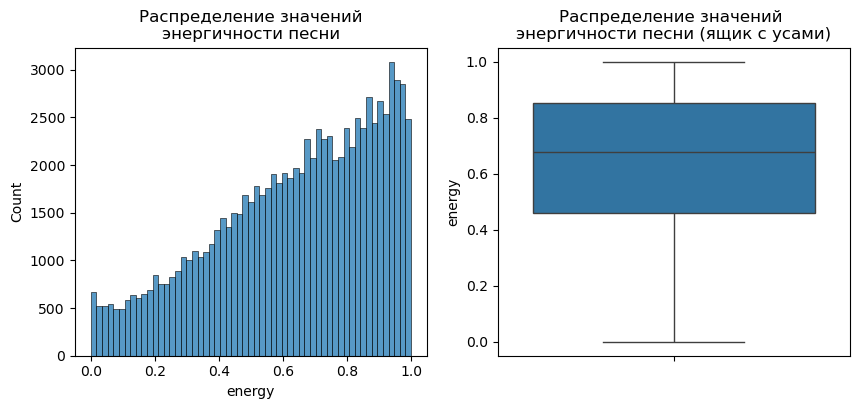

In [54]:
plot_hist_box(data_new, 'energy', '''Распределение значений
энергичности песни''', '''Распределение значений 
энергичности песни (ящик с усами)''')

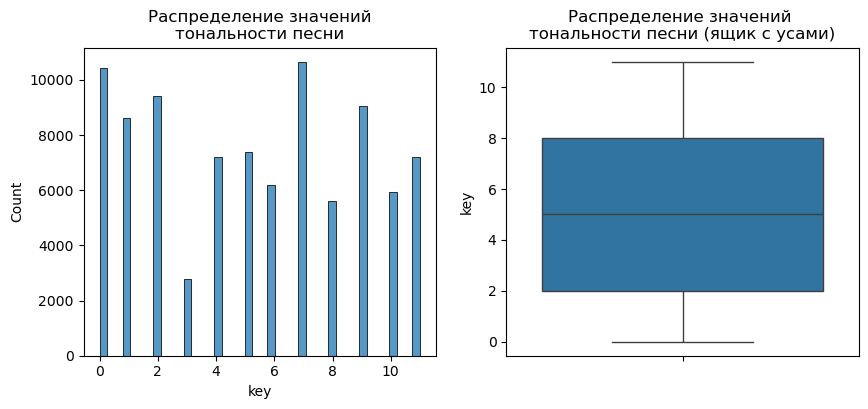

In [55]:
plot_hist_box(data_new, 'key', '''Распределение значений
тональности песни''', '''Распределение значений 
тональности песни (ящик с усами)''')

In [56]:
data_new['loudness'].sort_values().head(2)

81290   -49.531
80943   -49.307
Name: loudness, dtype: float64

In [57]:
data_new['loudness'].sort_values().tail()

34025    1.821
50862    1.864
34994    2.574
50750    3.156
16548    4.532
Name: loudness, dtype: float64

In [58]:
min_loudness = data_new['loudness'].min()
max_loudness = data_new['loudness'].max()

data_new['loudness_new'] = (data_new['loudness'] - min_loudness) / (max_loudness - min_loudness)

In [59]:
data_new.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,multi_genre,loudness_new
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",1,0.791392
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,"[acoustic, chill]",1,0.597377


In [60]:
data_new['loudness_new'].sort_values().tail()

34025    0.949855
50862    0.950650
34994    0.963783
50750    0.974548
16548    1.000000
Name: loudness_new, dtype: float64

<div class="alert alert-success">
Так как значения в признаке `loudness` были в диапозоне от -50 до 4, мы привели их к дипозону от 0 до 1.
</div>

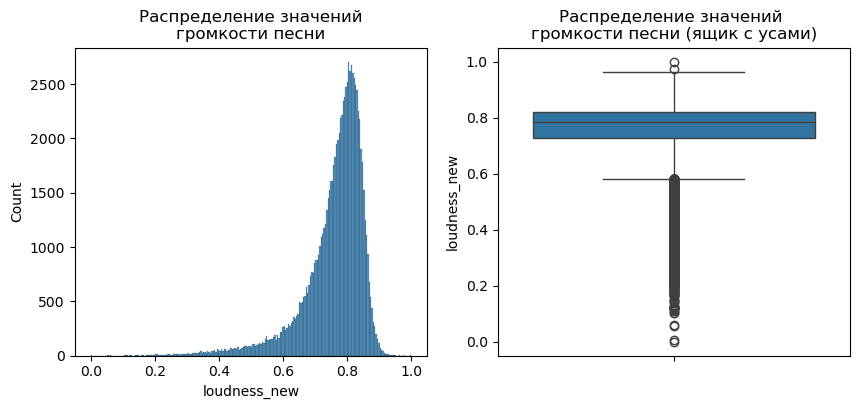

In [62]:
plot_hist_box(data_new, 'loudness_new', '''Распределение значений
громкости песни''', '''Распределение значений 
громкости песни (ящик с усами)''')

<div class="alert alert-success">
"Громкость" у некоторых песен меньше 0,2. Это песни с жанрами sleep, ambient и так далее, поэтому мы не считаем их за выбросы.
</div>

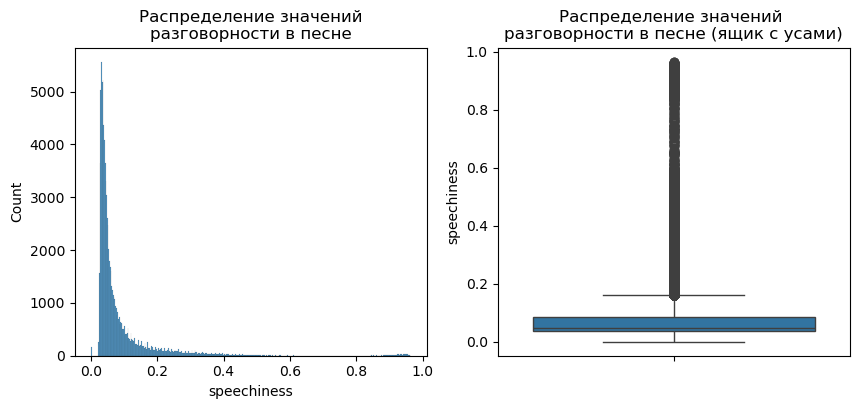

In [64]:
plot_hist_box(data_new, 'speechiness', '''Распределение значений
разговорности в песне''', '''Распределение значений 
разговорности в песне (ящик с усами)''')

<div class="alert alert-success">
"Разговорность" в песнях также могут достигать больших показателей в таких жанрах, как, например, рэп или комедия. 
</div>

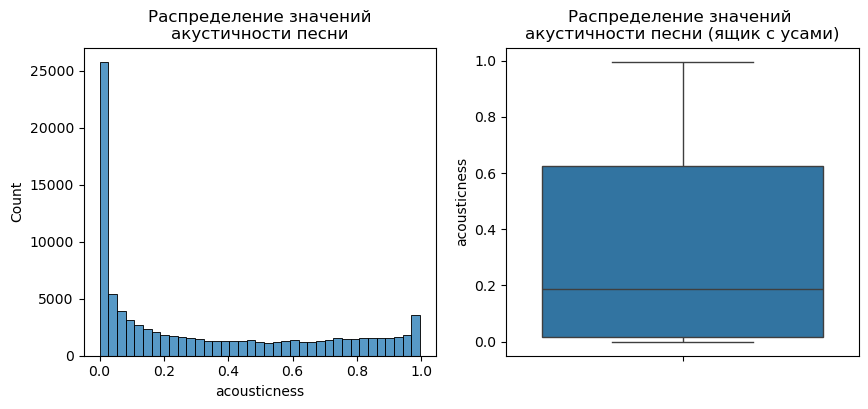

In [66]:
plot_hist_box(data_new, 'acousticness', '''Распределение значений
акустичности песни''', '''Распределение значений 
акустичности песни (ящик с усами)''')

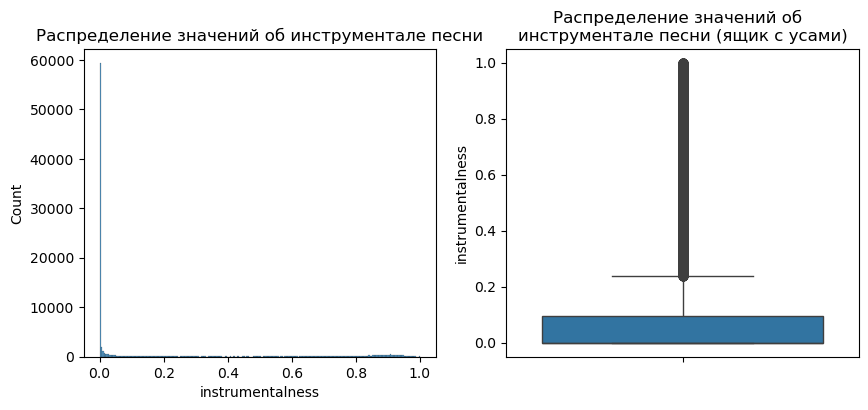

In [67]:
plot_hist_box(data_new, 'instrumentalness', '''Распределение значений об инструментале песни''', '''Распределение значений об  
инструментале песни (ящик с усами)''')

In [68]:
data_new[data_new['instrumentalness'] > 0.4].count()

track_id            17780
artists             17780
album_name          17780
track_name          17780
popularity          17780
duration_ms         17780
explicit            17780
danceability        17780
energy              17780
key                 17780
loudness            17780
mode                17780
speechiness         17780
acousticness        17780
instrumentalness    17780
liveness            17780
valence             17780
tempo               17780
time_signature      17780
track_genre         17780
multi_genre         17780
loudness_new        17780
dtype: int64

<div class="alert alert-success">
Большинство треков содержат в себе использование какого-либо инструментала, некоторые треки выступают в данных графиках как выбросы, так как не используют инструментал.
</div>

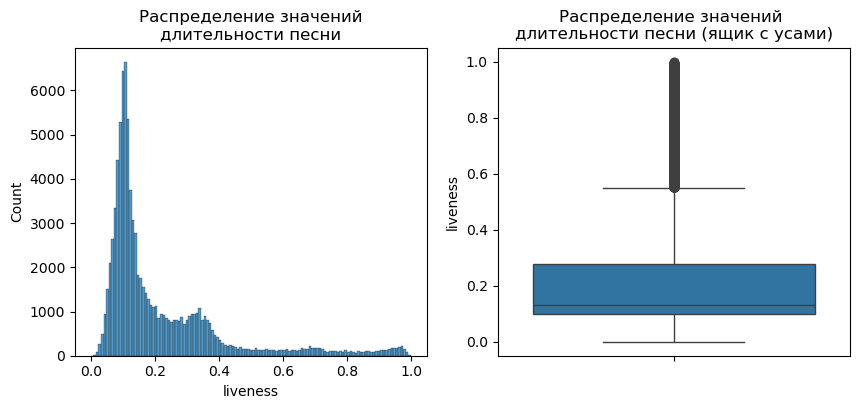

In [70]:
plot_hist_box(data_new, 'liveness', '''Распределение значений
длительности песни''', '''Распределение значений 
длительности песни (ящик с усами)''')

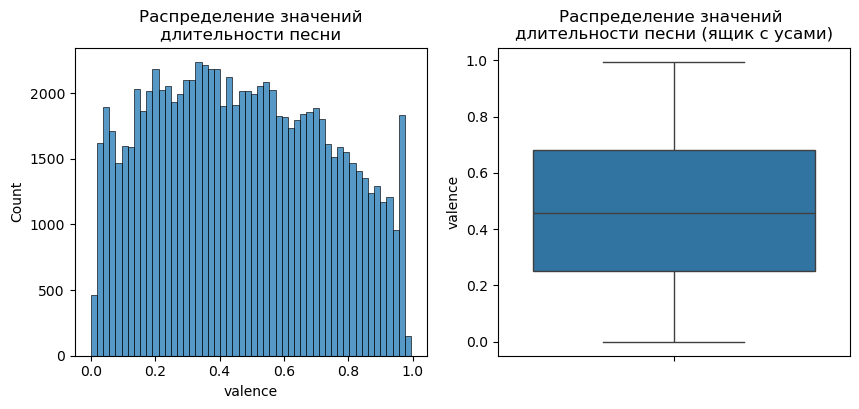

In [71]:
plot_hist_box(data_new, 'valence', '''Распределение значений
длительности песни''', '''Распределение значений 
длительности песни (ящик с усами)''')

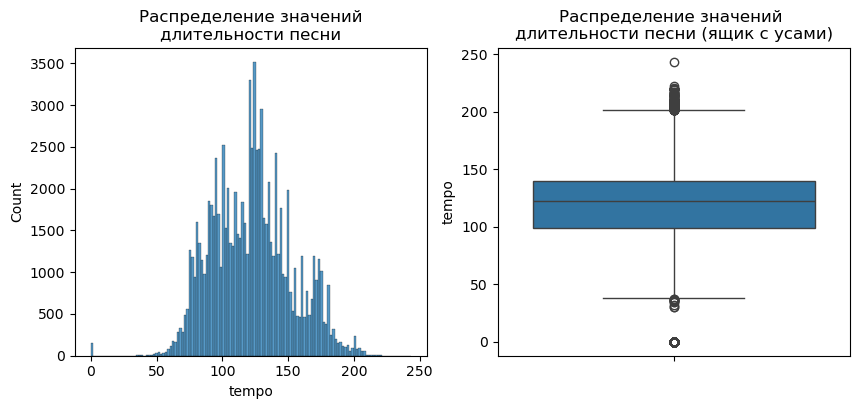

In [72]:
plot_hist_box(data_new, 'tempo', '''Распределение значений
длительности песни''', '''Распределение значений 
длительности песни (ящик с усами)''')

<div class="alert alert-success">
Скорость, с которой проигрывается песня, также может быть нулевая, например в жанре sleep, или высокая, например в жанре rap.
</div>

In [74]:
data_new['intens'] = data_new[['danceability', 'energy', 'loudness_new', 'tempo']].mean(axis=1)

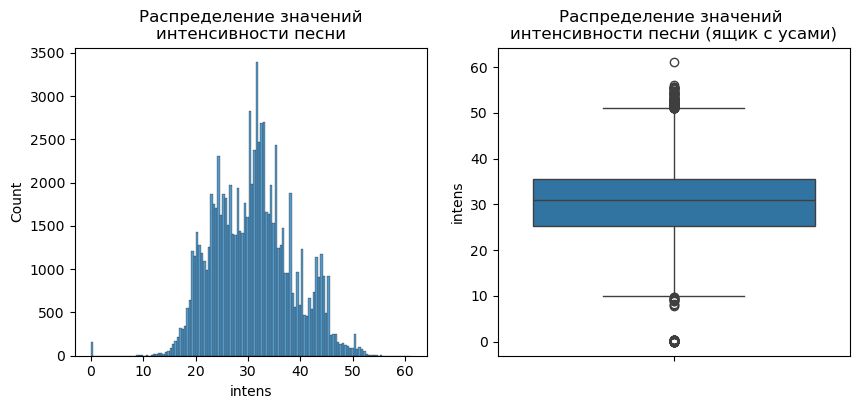

In [75]:
plot_hist_box(data_new, 'intens', '''Распределение значений
интенсивности песни''', '''Распределение значений 
интенсивности песни (ящик с усами)''')

In [76]:
data_new.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,multi_genre,loudness_new,intens
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",1,0.791392,22.461348
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,"[acoustic, chill]",1,0.597377,19.668094


<div class="alert alert-success">
Создали новый признак intens, который совмещает в себе "танцевальность", "энергичность", "громкость", "темп" песни и отвечает за "интенсивность" песни.
</div>

In [78]:
def pie(sign, desc):
    fig, axs = plt.subplots(figsize=(5, 5))
    
    labels = data_new[sign].value_counts().index.tolist()
    axs.pie(data_new[sign].value_counts(), autopct='%1.1f%%', labels = labels)

    fig.suptitle(desc)

    plt.show()

<div class="alert alert-success">
Написали функцию для визуализации категориальных признаков при помощи круговой диаграммы.
</div>

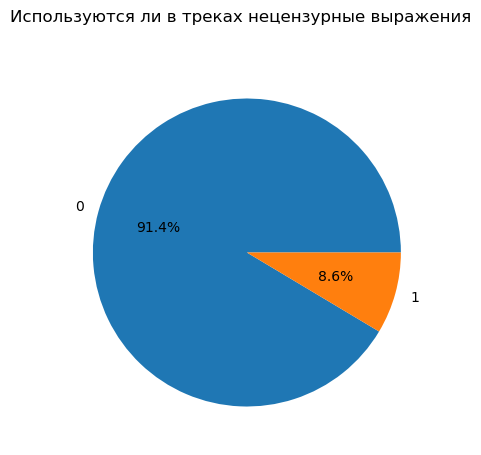

In [80]:
pie('explicit', 'Используются ли в треках нецензурные выражения')

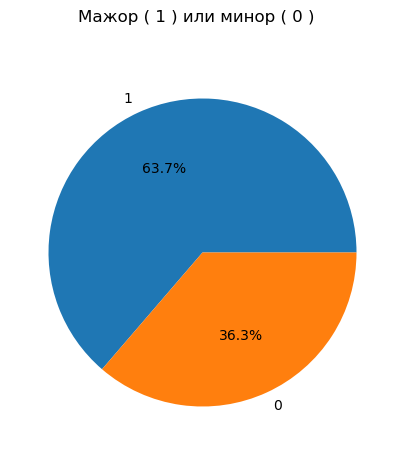

In [81]:
pie('mode', 'Мажор ( 1 ) или минор ( 0 )')

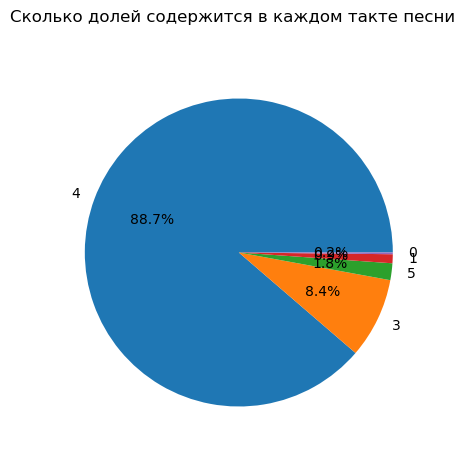

In [82]:
pie('time_signature', 'Сколько долей содержится в каждом такте песни')

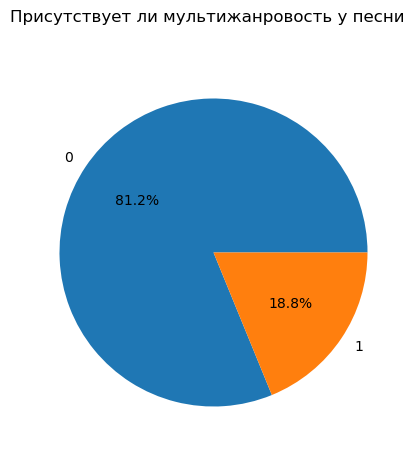

In [83]:
pie('multi_genre', 'Присутствует ли мультижанровость у песни')

<div class="alert alert-success">
В 8,6% песен присутствуют нецензурные выражения. 63,7% песен исполнены в мажоре. Большинство треков использует 4 доли в каждом такте песни (88,9%). У 18,9% песен 2 и больше жанров.
</div>

In [85]:
numerical_col = data_new.select_dtypes(include=['number']).columns

In [86]:
data_new[numerical_col].corr(method = 'spearman')

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,multi_genre,loudness_new,intens
popularity,1.000000,0.012277,0.049678,0.055143,-0.016681,0.003413,0.065802,-0.015576,-0.067269,0.010849,-0.123347,-0.011348,-0.011159,0.007717,0.041385,0.086496,0.065802,0.008173
duration_ms,0.012277,1.000000,-0.092410,-0.083380,0.114452,0.017222,0.031850,-0.048964,-0.124377,-0.178217,0.119037,-0.041568,-0.169717,0.052987,0.030593,-0.003347,0.031850,0.053512
explicit,0.049678,-0.092410,1.000000,0.117994,0.088326,0.007366,0.109687,-0.034107,0.269253,-0.081458,-0.127324,0.040370,0.000632,-0.008027,0.044999,-0.001151,0.109687,-0.006256
danceability,0.055143,-0.083380,0.117994,1.000000,0.049154,0.033466,0.114889,-0.069140,0.152573,-0.053088,-0.156132,-0.148902,0.475161,-0.049321,0.183487,0.033414,0.114889,-0.042592
energy,-0.016681,0.114452,0.088326,0.049154,1.000000,0.043402,0.752668,-0.070361,0.350064,-0.711779,-0.041905,0.181892,0.205338,0.250167,0.168434,0.031318,0.752668,0.260863
key,0.003413,0.017222,0.007366,0.033466,0.043402,1.000000,0.028451,-0.139088,0.040304,-0.040869,0.003610,-0.006009,0.025321,0.008549,0.015383,0.009624,0.028451,0.009225
loudness,0.065802,0.031850,0.109687,0.114889,0.752668,0.028451,1.000000,-0.039302,0.218028,-0.536538,-0.298595,0.114553,0.227083,0.209200,0.159546,0.077740,1.000000,0.219236
mode,-0.015576,-0.048964,-0.034107,-0.069140,-0.070361,-0.139088,-0.039302,1.000000,-0.108940,0.082846,-0.077229,0.015433,0.024348,-0.001276,-0.027625,0.008740,-0.039302,-0.002253
speechiness,-0.067269,-0.124377,0.269253,0.152573,0.350064,0.040304,0.218028,-0.108940,1.000000,-0.214893,-0.051506,0.094767,0.082848,0.109445,0.078693,-0.027620,0.218028,0.113645
acousticness,0.010849,-0.178217,-0.081458,-0.053088,-0.711779,-0.040869,-0.536538,0.082846,-0.214893,1.000000,-0.095016,-0.044962,-0.022017,-0.227433,-0.163084,-0.049697,-0.536538,-0.234771


<div class="alert alert-success">
Создали корреляцию количественных признаков от тагрета (popularity).  Большинство признаков не превышает корреляцию 0,1.   
</div>

In [88]:
categorical_col = ['artists', 'album_name', 'track_name']

data_cat = data_new.copy()

label_encoders = {}
for col in categorical_col:
    le = LabelEncoder()
    data_cat[col] = le.fit_transform(data_cat[col])
    label_encoders[col] = le

In [89]:
data_new.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,multi_genre,loudness_new,intens
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",1,0.791392,22.461348
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,"[acoustic, chill]",1,0.597377,19.668094


In [90]:
data_cat[['popularity', 'artists', 'album_name', 'track_name']].corr()

,popularity,artists,album_name,track_name
popularity,1.000000,-0.000725,0.029200,0.007155
artists,-0.000725,1.000000,0.096396,0.044169
album_name,0.029200,0.096396,1.000000,0.315269
track_name,0.007155,0.044169,0.315269,1.000000


<div class="alert alert-success">
Создали корреляцию категориальных признаков от тагрета (popularity).
</div>

# Шаг 4. Подготовка данных

In [93]:
data_new.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,multi_genre,loudness_new,intens
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]",1,0.791392,22.461348
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,"[acoustic, chill]",1,0.597377,19.668094


In [94]:
X = data_new.drop(['popularity',
                   'track_id',
                   'loudness',
                   'time_signature',
                   'key',
                   'tempo'] ,axis = 1) 
y = data_new['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [95]:
X_test.head()

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,track_genre,multi_genre,loudness_new,intens
43156,The Bouncing Souls,The Gold Record,Better Things,207026,0,0.439,0.966,1,0.0693,0.00815,0.000007,0.148,0.607,[hardcore],0,0.867321,42.312080
85629,Juan D'Arienzo;Alberto Echagüe,Juan D'arienzo y Alberto Echague,Bien Pulenta,167080,0,0.580,0.650,0,0.0971,0.92600,0.000088,0.061,0.704,[tango],0,0.807114,34.309528
74545,Kvatro,"XV лет, Часть 2",Caruso,206866,0,0.335,0.292,0,0.0353,0.89400,0.000070,0.123,0.195,[romance],0,0.781644,32.609161
70848,Korol i Shut,Акустический альбом,Прыгну со скалы,190506,0,0.304,0.764,0,0.0634,0.24900,0.000000,0.263,0.353,[punk-rock],0,0.812552,38.465138
90264,Buena Vista Social Club,Buena Vista Social Club,De Camino a la Vereda,303973,0,0.630,0.462,1,0.0406,0.84900,0.000186,0.125,0.963,[world-music],0,0.716553,21.515138


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72368 entries, 87525 to 15795
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           72368 non-null  object 
 1   album_name        72368 non-null  object 
 2   track_name        72368 non-null  object 
 3   duration_ms       72368 non-null  int64  
 4   explicit          72368 non-null  int32  
 5   danceability      72368 non-null  float64
 6   energy            72368 non-null  float64
 7   mode              72368 non-null  int64  
 8   speechiness       72368 non-null  float64
 9   acousticness      72368 non-null  float64
 10  instrumentalness  72368 non-null  float64
 11  liveness          72368 non-null  float64
 12  valence           72368 non-null  float64
 13  track_genre       72368 non-null  object 
 14  multi_genre       72368 non-null  int64  
 15  loudness_new      72368 non-null  float64
 16  intens            72368 non-null  float64

In [97]:
X_train.columns

Index(['artists', 'album_name', 'track_name', 'duration_ms', 'explicit',
       'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'track_genre', 'multi_genre',
       'loudness_new', 'intens'],
      dtype='object')

In [98]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(72368, 17) (18092, 17)
(72368,) (18092,)


In [99]:
X_col_num = X.select_dtypes(include=['number']).columns

In [100]:
num_columns = X_col_num
ohe_columns = ['artists', 'album_name', 'track_name']
mlb_columns = ['track_genre']

In [101]:
num_columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'multi_genre', 'loudness_new', 'intens'],
      dtype='object')

In [102]:
ohe_columns

['artists', 'album_name', 'track_name']

In [103]:
mlb_columns

['track_genre']

<div class="alert alert-success">
Подготовили тренировочную и тестовую выборки: 80% на 20% от всей выборки соотвественно. В качестве количественных признаков выбрали все, кроме loudness (мы заменили этот столбец на loudness_new), time_signature, key, tempo (имеют плохую кореляцию с таргетом). Также выбрали все признаки в качестве категориальных.
</div>

# Шаг 5. Обучение моделей

<div class="alert alert-success">
Создадим один пайплайн с предобработкой для будущих моделей. 
</div>

In [107]:
def binarize_genres(genres):
    mlb = MultiLabelBinarizer()
    return mlb.fit_transform(genres)

In [108]:
X_train['track_genre'] = X_train['track_genre'].apply(lambda x: x if isinstance(x, list) else [x])

<div class="alert alert-success">
Для обработки признака track_genre перед обучением нужно масштабировать все строки с помощью MultiLabelBinarizer, так как каждая строки - это массив меток. Для этого создали функцию binarize_genres, которая автоматически масштабирует все строки. Также проверили признак track_genre на наличие пустых списков. Затем нужно вставить в пайплайн с помощью FunctionTransformer.  
</div>

In [110]:
data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('track_genre', FunctionTransformer(binarize_genres, validate=False), 'track_genre'),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True), ohe_columns)
    ],
    remainder='passthrough'
)
# Основная модель
pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeRegressor())
])

In [111]:
pipeline.set_params(model__max_depth=5)  # Set max_depth for DecisionTreeRegressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['duration_ms', 'explicit', 'danceability', 'energy', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'multi_genre', 'loudness_new', 'intens'],
      dtype='object')),
                                                 ('track_genre',
                                                  FunctionTransformer(func=<function binarize_genres at 0x000002B5020DA340>),
                                                  'track_genre'),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['artists', 'album_name',
                                                   'track_name'])])),
                ('model', DecisionTreeRegressor(max_depth=5))])

<div class="alert alert-success">
Количественные данные масштабировали с помощью  StandardScaler, категориальные - OneHotEncoder, а массив меток -  MultiLabelBinarizer. Теперь обучаем 4 модели: 
    
    - линейную регрессию
    
    - модель градиентного бустинга
    
    - дерево решений
    
    - нейронную сеть

После обучения каждой модели запомним их метрики для дальнейшего анализа.
</div>

`LinearRegression`

In [114]:
param_grid_1 = [
    {
        'model': [LinearRegression()]
    }
]

In [115]:
rs_1 = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_grid_1, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state = 42
)

In [116]:
print(X_train.columns)
print(num_columns)
print(ohe_columns)
print(mlb_columns)

Index(['artists', 'album_name', 'track_name', 'duration_ms', 'explicit',
       'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'track_genre', 'multi_genre',
       'loudness_new', 'intens'],
      dtype='object')
Index(['duration_ms', 'explicit', 'danceability', 'energy', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'multi_genre', 'loudness_new', 'intens'],
      dtype='object')
['artists', 'album_name', 'track_name']
['track_genre']


In [117]:
start_time_1 = time.time()
rs_1.fit(X_train, y_train)
end_time_1 = time.time()
gs_time_1 = end_time_1 - start_time_1

In [118]:
y_pred_1 = rs_1.predict(X_test)

In [119]:
mae_1 = mean_absolute_error(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)
rmse_1 = mse_1 ** 0.5

`GradientBoostingRegressor`

In [121]:
param_grid_2 = [
    {
        'model': [GradientBoostingRegressor()],
        'model__max_depth': [3, 5, 7]
    }
]

In [122]:
rs_2 = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_grid_2, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state = RANDOM_STATE
)

In [123]:
start_time_2 = time.time()
rs_2.fit(X_train, y_train)
end_time_2 = time.time()
gs_time_2 = end_time_2 - start_time_2

In [124]:
y_pred_2 = rs_2.predict(X_test)

In [125]:
mae_2 = mean_absolute_error(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
rmse_2 = mse_2 ** 0.5

`DecisionTreeRegressor`

In [127]:
param_grid_3 = [
    {
        'model': [DecisionTreeRegressor(random_state = RANDOM_STATE)],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
]

In [128]:
rs_3 = RandomizedSearchCV(
    pipeline, 
    param_grid_3, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state = RANDOM_STATE
)

In [129]:
start_time_3 = time.time()
rs_3.fit(X_train, y_train)
end_time_3 = time.time()
gs_time_3 = end_time_3 - start_time_3

In [130]:
y_pred_3 = rs_3.predict(X_test)

In [131]:
mae_3 = mean_absolute_error(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
rmse_3 = mse_3 ** 0.5

`Keras`

<div class="alert alert-success">
Для модели нейронной сети сначала создадим функцию create_mlp_model, которая определит многослойную нейронную сеть (MLP) с использованием Keras.  Создадим экземпляр KerasRegressor, который будет связывать модель с параметрами обучения. Затем предобработаем данные в data_preprocessor, узнаем размер преобработанной тренировочной выборки (размер нужен нам для функции mlp) и обучим модель.
</div>

In [134]:
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from tensorflow.keras import layers

In [135]:
def create_mlp_model(optimizer='adam', neurons=64):
    model = keras.Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_shape=(127478,)))
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

    
mlp_model = KerasRegressor(model=create_mlp_model, epochs=10, batch_size=32,validation_split=0.2)

    
data_preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_columns),
            ('track_genre', FunctionTransformer(binarize_genres, validate=False), 'track_genre'),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True), ohe_columns)
                ],
                remainder='passthrough'
            )
    
rs_4 = Pipeline([
            ('preprocessor', data_preprocessor),
            ('model', mlp_model)
])
start_time_4 = time.time()
rs_4.fit(X_train, y_train)
end_time_4 = time.time()
gs_time_4 = end_time_4 - start_time_4

y_pred_4 = rs_4.predict(X_test)
    
mae_4 = mean_absolute_error(y_test, y_pred_4)
    
mse_4 = mean_squared_error(y_test, y_pred_4)
    
r2_4 = r2_score(y_test, y_pred_4)
   
rmse_4 = mse_4 ** 0.5

Epoch 1/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 155s 85ms/step - loss: 496.0389 - val_loss: 136.9382
Epoch 2/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 154s 85ms/step - loss: 76.3599 - val_loss: 112.0946
Epoch 3/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 154s 85ms/step - loss: 31.2404 - val_loss: 101.5590
Epoch 4/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 154s 85ms/step - loss: 18.0030 - val_loss: 98.1183
Epoch 5/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 153s 85ms/step - loss: 13.9945 - val_loss: 95.7148
Epoch 6/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 155s 86ms/step - loss: 11.5860 - val_loss: 93.9917
Epoch 7/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 155s 86ms/step - loss: 9.0381 - val_loss: 93.6823
Epoch 8/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 155s 86ms/step - loss: 7.7122 - val_loss: 93.5638
Epoch 9/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 155s 86ms/step - loss: 6.6800 - val_loss: 93.5840
Epoch 10/10
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 155s 85ms/step - loss: 5.4672 - val_loss: 92.6274
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [136]:
from sklearn.model_selection import cross_val_score
def cross_val(x_, y_):
    def create_mlp_model(optimizer='adam', neurons=64):
        model = keras.Sequential()
        model.add(layers.Dense(neurons, activation='relu', input_shape=(106610,)))
        model.add(layers.Dense(neurons, activation='relu'))
        model.add(layers.Dense(1))
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        return model

    
    mlp_model = KerasRegressor(model=create_mlp_model, epochs=10, batch_size=32,validation_split=0.2)

    
    data_preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_columns),
            ('track_genre', FunctionTransformer(binarize_genres, validate=False), 'track_genre'),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True), ohe_columns)
                ],
                remainder='passthrough'
            )
    
    rs_4 = Pipeline([
            ('preprocessor', data_preprocessor),
            ('model', mlp_model)
        ])
    
    return print(cross_val_score(rs_4, x_, y_, cv=5, scoring='neg_root_mean_squared_error'))

<div class="alert alert-success">
Также написали функцию для кросс-валидации с метрикой RMSE с 5-ю фолдами.
</div>

# Шаг 6. Результаты обучения

<div class="alert alert-success">
Все результаты занесем в таблицу results.
</div>

In [140]:
results = pd.DataFrame({'LinearRegression': {'fit_time': gs_time_1,
                                             'mae': mae_1,
                                             'mse': mse_1,
                                             'rmse': rmse_1,
                                             'r2' : r2_1},
                         'GradientBoostingRegressor': {'fit_time': gs_time_2,
                                                   'mae': mae_2,
                                                   'mse': mse_2,
                                                   'rmse': rmse_2,
                                                   'r2' : r2_2},
                         'DecisionTreeRegressor': {'fit_time': gs_time_3,
                                            'mae': mae_3,
                                            'mse': mse_3,
                                            'rmse': rmse_3,
                                            'r2' : r2_3},
                         'Keras': {'fit_time': gs_time_4,
                                            'mae': mae_4,
                                            'mse': mse_4,
                                            'rmse': rmse_4,
                                            'r2' : r2_4}})
results

,LinearRegression,GradientBoostingRegressor,DecisionTreeRegressor,Keras
fit_time,86.953702,234.275157,164.532700,1547.496584
mae,8.663200,12.093863,8.629046,6.431129
mse,179.407826,247.003172,232.262984,91.486063
rmse,13.394321,15.716335,15.240177,9.564835
r2,0.571788,0.410450,0.445632,0.781640


<div class="alert alert-success">
    Наименьшее значение MAE продемонстрировала модель Keras (6.43), что указывает на её лучшую точность в предсказаниях по сравнению с другими моделями.
    Модель Keras показала наименьшее значение MSE (91.4) и ,соотвественно, RMSE (9.5), что подтверждает её высокую точность. Наивысший R² (0.78) также у модели нейронной сети, что говорит о том, что она лучше всего объясняет вариацию зависимой переменной.

    
Модель Keras продемонстрировала наилучшие результаты по большинству метрик, что делает её предпочтительным выбором для данной задачи. Время ее обучения состовляет 1547 секунд.
</div>

In [142]:
from sklearn.dummy import DummyRegressor

In [143]:
test_mae = mean_absolute_error(y_test, y_pred_4)
test_mae

6.431129246876022

In [144]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_pred = dummy_regr.predict(X_test)
dummy_mae = mean_absolute_error(y_test, dummy_pred)

if test_mae < dummy_mae:
    print("Эта модель является адекватной по сравнению с DummyRegressor.")
else:
    print("Эта модель является адекватной по сравнению с DummyRegressor.")

Эта модель является адекватной по сравнению с DummyRegressor.


In [145]:
dummy_mae

17.185682035450125

<div class="alert alert-success">
    Проверили модель на адекватность с константной моделью. Модель оказалась адекватной по сравнению с DummyRegressor.
</div>

In [147]:
from sklearn.model_selection import cross_val_score

In [149]:
cross_val_keras = cross_val(X_train, y_train)
cross_val_keras

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 103s 71ms/step - loss: 557.7831 - val_loss: 150.1400
Epoch 2/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 103s 71ms/step - loss: 83.8701 - val_loss: 119.0492
Epoch 3/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 103s 71ms/step - loss: 33.6410 - val_loss: 110.3168
Epoch 4/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 102s 70ms/step - loss: 19.1806 - val_loss: 105.4663
Epoch 5/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 102s 71ms/step - loss: 15.1083 - val_loss: 104.4984
Epoch 6/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 103s 71ms/step - loss: 12.2015 - val_loss: 102.3769
Epoch 7/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 102s 70ms/step - loss: 10.1229 - val_loss: 101.9406
Epoch 8/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 102s 71ms/step - loss: 8.4801 - val_loss: 100.7047
Epoch 9/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 102s 70ms/step - loss: 7.4164 - val_loss: 100.2542
Epoch 10/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 102s 71ms/step - loss: 6.3954 - val_loss: 98.4645
453/453 ━━━━━━━━━━

<div class="alert alert-success">
Сделали кросс валидацию и разделили данные на 5 фолдов, чтобы проверить модель на переобучение. Выяснили, что модель будет хорошо работать на новых данных, так как метрика RMSE на кросс валидации составила 9.
</div>

In [157]:
from matplotlib import rcParams

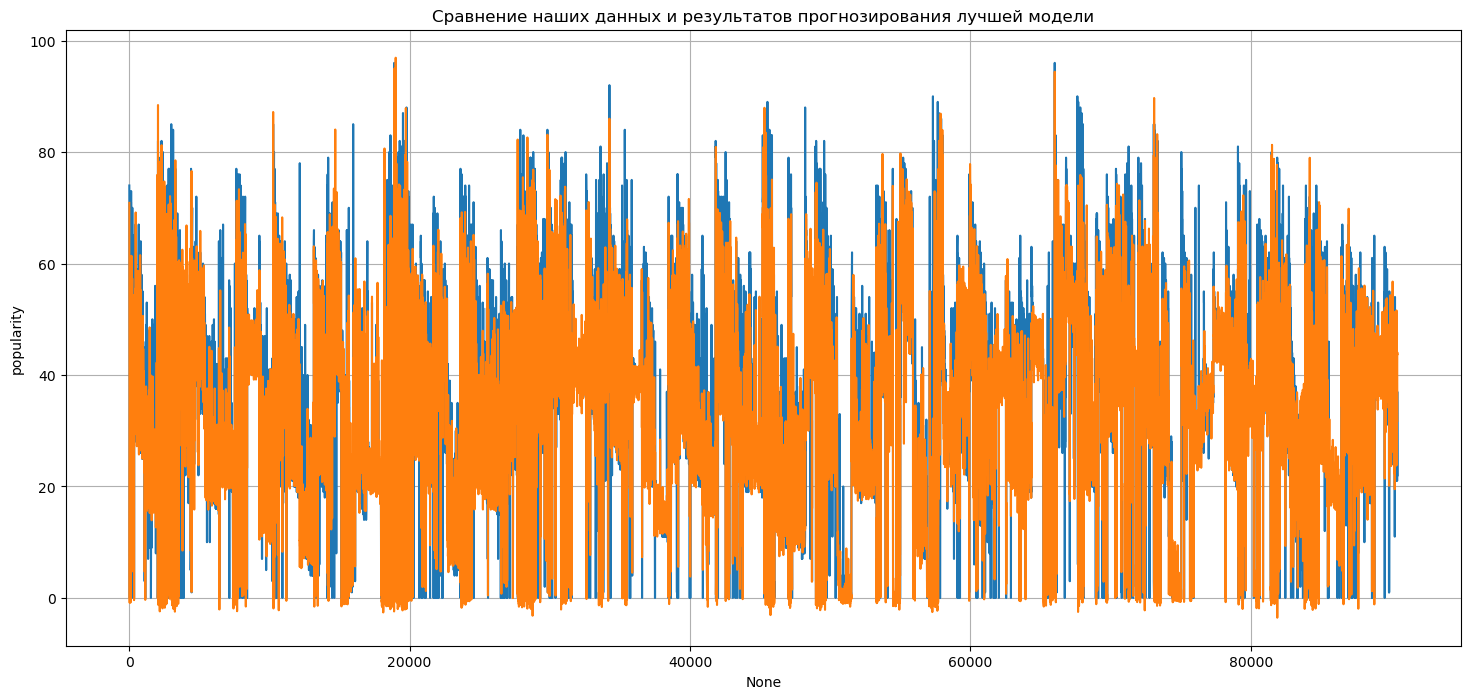

In [159]:
rcParams['figure.figsize'] = 18, 8
sns.lineplot(data=y_test, dashes=False)
sns.lineplot(x=y_test.index, y=y_pred_4, dashes=False)
plt.grid(True)
plt.title('Сравнение наших данных и результатов прогнозирования лучшей модели')
plt.show()

<div class="alert alert-success">
    Сравнили на графике предсказания лучшей модели с нашими данными. Можно заметить, что наши данные, это проекция предсказаний модели, что хорошо показывает точность предсказаний. 
</div>

# Шаг 7. Важность признаков 

In [161]:
from contextlib import redirect_stdout
import os

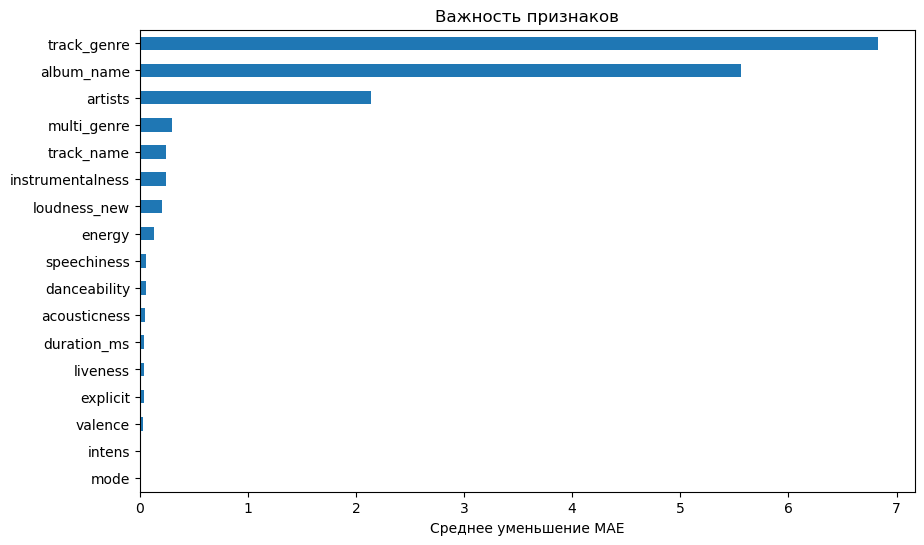

In [163]:
with open(os.devnull, 'w') as f, redirect_stdout(f):
    result = permutation_importance(rs_4, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

<div class="alert alert-success">
Из графика важности признаков можно сказать, что для предсказания популярности песни стоит в приоритете жанр песни, затем идет название альбома, а потом имя исполнителя. Почти никакой роли не играют такие признаки, как "позитивность", "режим" и "интенсивность".
</div>

# Общие выводы

    Модель нейронной сети Keras показала лучшие результаты в предсказании популярности песен. Она имеет более низкую ошибку и временные затраты на обучение.

    Рекомендации для заказчика:

     1. Продолжать использовать модель keras для прогнозирования популярности песен.

     2. Добавить больше признаков, которые хорошо коррелируют с таргетом, для оптимизации модели и улучшения метрик.
   
     3. Обратить внимание на признаки, которые оказывают наибольшее влияние на популярность песен и уделить им особое внимание в процессе управления приложением.
     
     4. Провести дополнительный анализ и оптимизацию других факторов, таких как валентность, доли в такте, разговорность, наличие цензуры в треках, чтобы выявить их потенциальное влияние на популярность и возможность их оптимизации.